# Import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno
import statsmodels.api as sm
#import tensorflow as tf
#import xgboost as xgb
import pytz
import re
from datetime import datetime
from pytz import timezone
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import neighbors
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import Range1d
#from tensorflow.keras.layers import Dense,Activation,Dropout
#from tensorflow.keras.models import Sequential,load_model
#from tensorflow.keras.optimizers import SGD, Adam
#from tensorflow.keras.models import Sequential
from collections import Counter
from scipy import stats
from sklearn.linear_model import LinearRegression, BayesianRidge, Ridge ,Lasso ,ElasticNet, LassoLarsIC
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import KFold,RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, scale, LabelEncoder  
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.svm import SVR
#from catboost import CatBoostRegressor
#from lightgbm import LGBMRegressor
#from xgboost import XGBRegressor
from warnings import filterwarnings
filterwarnings('ignore')

# Load

In [20]:
df = pd.read_csv(r"C:\Users\Hamza\Desktop\P2P ortak dosya\Makine Öğrenmesi\Solar1\solar_predict.xls")     #dataframe determined
df.columns=["Date","Time","Power","Load","Temp"]   #the columns in our dataframe
df

,Date,Time,Power,Load,Temp
0,1/1/2015,12:00:00 AM,0.000,0.468530,23.724
1,1/1/2015,1:00:00 AM,0.000,0.421974,23.117
2,1/1/2015,2:00:00 AM,0.000,0.431844,22.713
3,1/1/2015,3:00:00 AM,0.000,0.408764,22.197
4,1/1/2015,4:00:00 AM,0.000,0.388010,21.737
...,...,...,...,...,...
8755,12/31/2015,7:00:00 PM,0.059,1.448452,30.603
8756,12/31/2015,8:00:00 PM,0.000,1.309085,28.025
8757,12/31/2015,9:00:00 PM,0.000,1.152608,26.521
8758,12/31/2015,10:00:00 PM,0.000,1.020149,25.404


# EDA

In [8]:
from datetime import datetime
from pytz import timezone
import pytz
df.index=df.iloc[:,0]
df.index = pd.to_datetime(df.index)  #convert to date
df.drop(['Load'], axis=1, inplace=True)   #I will just look at PV Generation
df


,Date,Time,Power,Temp
Date,,,,
2015-01-01,1/1/2015,12:00:00 AM,0.000,23.724
2015-01-01,1/1/2015,1:00:00 AM,0.000,23.117
2015-01-01,1/1/2015,2:00:00 AM,0.000,22.713
2015-01-01,1/1/2015,3:00:00 AM,0.000,22.197
2015-01-01,1/1/2015,4:00:00 AM,0.000,21.737
...,...,...,...,...
2015-12-31,12/31/2015,7:00:00 PM,0.059,30.603
2015-12-31,12/31/2015,8:00:00 PM,0.000,28.025
2015-12-31,12/31/2015,9:00:00 PM,0.000,26.521


In [9]:
df['MonthOfYear'] = df.index.strftime('%m').astype(int)
df['DayOfYear'] = df.index.strftime('%j').astype(int)
df['WeekOfYear'] = df.index.strftime('%U').astype(int)

In [10]:
df.index=df.iloc[:,1]
df.index = pd.to_datetime(df.index)
df['TimeOfDay'] = df.index.hour
df.tail(50)

,Date,Time,Power,Temp,MonthOfYear,DayOfYear,WeekOfYear,TimeOfDay
Time,,,,,,,,
2021-04-21 22:00:00,12/29/2015,10:00:00 PM,0.000,22.418,12,363,52,22
2021-04-21 23:00:00,12/29/2015,11:00:00 PM,0.000,21.795,12,363,52,23
2021-04-21 00:00:00,12/30/2015,12:00:00 AM,0.000,21.398,12,364,52,0
2021-04-21 01:00:00,12/30/2015,1:00:00 AM,0.000,21.062,12,364,52,1
2021-04-21 02:00:00,12/30/2015,2:00:00 AM,0.000,20.730,12,364,52,2
2021-04-21 03:00:00,12/30/2015,3:00:00 AM,0.000,20.639,12,364,52,3
2021-04-21 04:00:00,12/30/2015,4:00:00 AM,0.000,20.950,12,364,52,4
2021-04-21 05:00:00,12/30/2015,5:00:00 AM,0.000,21.459,12,364,52,5
2021-04-21 06:00:00,12/30/2015,6:00:00 AM,0.116,22.896,12,364,52,6


In [11]:
df.describe()

,Power,Temp,MonthOfYear,DayOfYear,WeekOfYear,TimeOfDay
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,0.594862,16.518688,6.525342,182.979224,26.139498,11.500000
std,0.821411,6.806605,3.447954,105.371450,15.057713,6.922582
min,0.000000,1.345000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,11.425500,4.000000,92.000000,13.000000,5.750000
50%,0.002500,15.184000,7.000000,183.000000,26.000000,11.500000
75%,1.171250,20.751750,10.000000,274.000000,39.000000,17.250000
max,2.649000,39.704000,12.000000,365.000000,52.000000,23.000000


<AxesSubplot:>

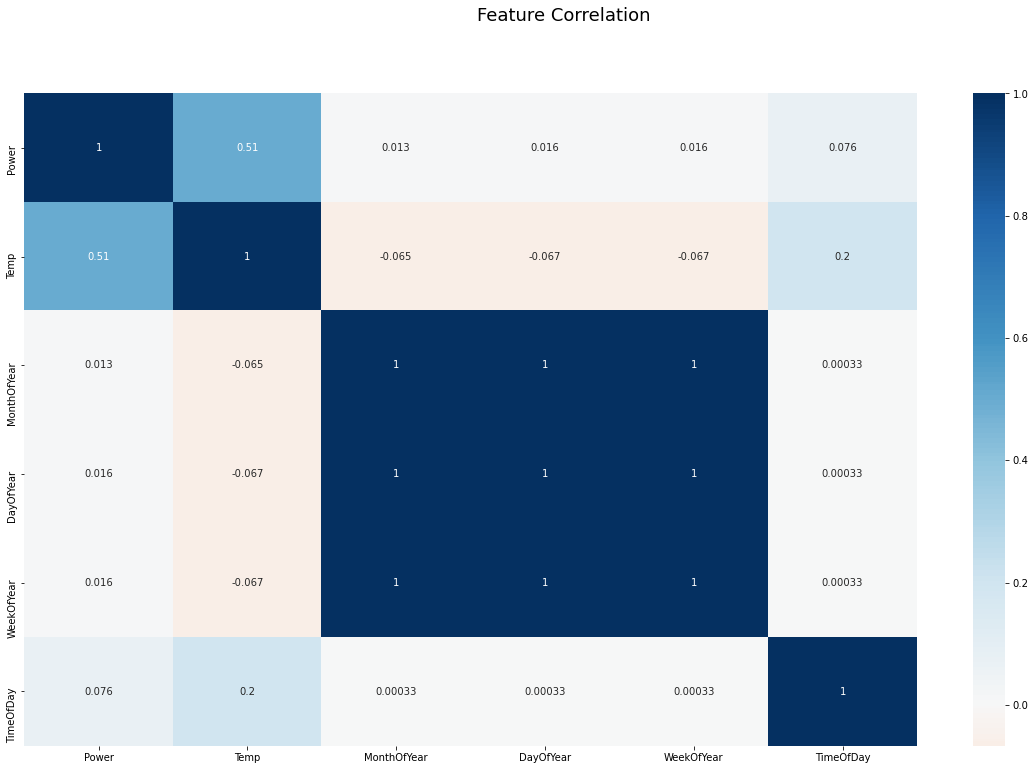

In [12]:
fig = plt.figure(figsize=(20, 12))
fig.suptitle('Feature Correlation', fontsize=18)
sns.heatmap(df.corr(), annot=True, cmap='RdBu', center=0 )

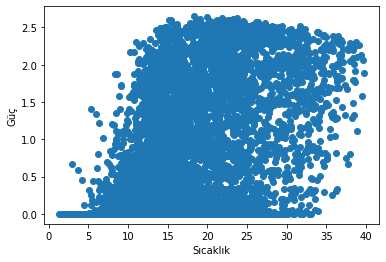

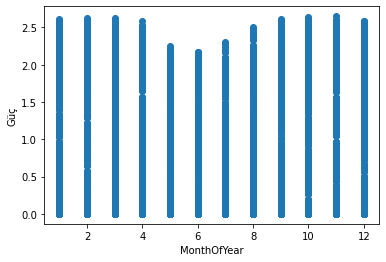

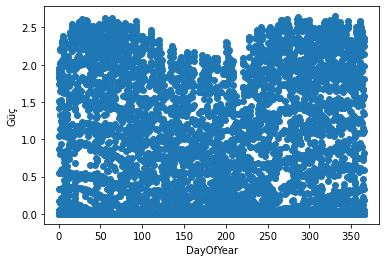

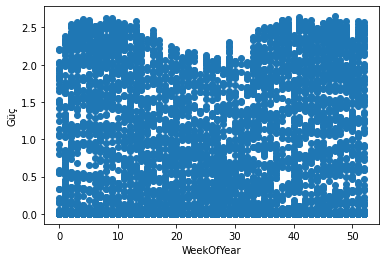

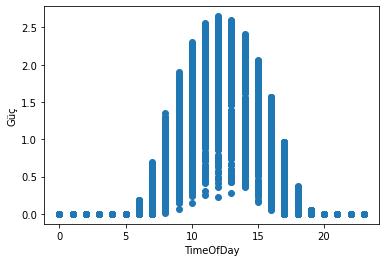

In [13]:
plt.scatter(y = "Power", x = "Temp", data = df)
plt.xlabel("Sıcaklık")
plt.ylabel("Güç")
plt.show()

plt.scatter(y = "Power", x = "MonthOfYear", data = df)
plt.xlabel("MonthOfYear")
plt.ylabel("Güç")
plt.show()

plt.scatter(y = "Power", x = "DayOfYear", data = df)
plt.xlabel("DayOfYear")
plt.ylabel("Güç")
plt.show()

plt.scatter(y = "Power", x = "WeekOfYear", data = df)
plt.xlabel("WeekOfYear")
plt.ylabel("Güç")
plt.show()

plt.scatter(y = "Power", x = "TimeOfDay", data = df)
plt.xlabel("TimeOfDay")
plt.ylabel("Güç")
plt.show()



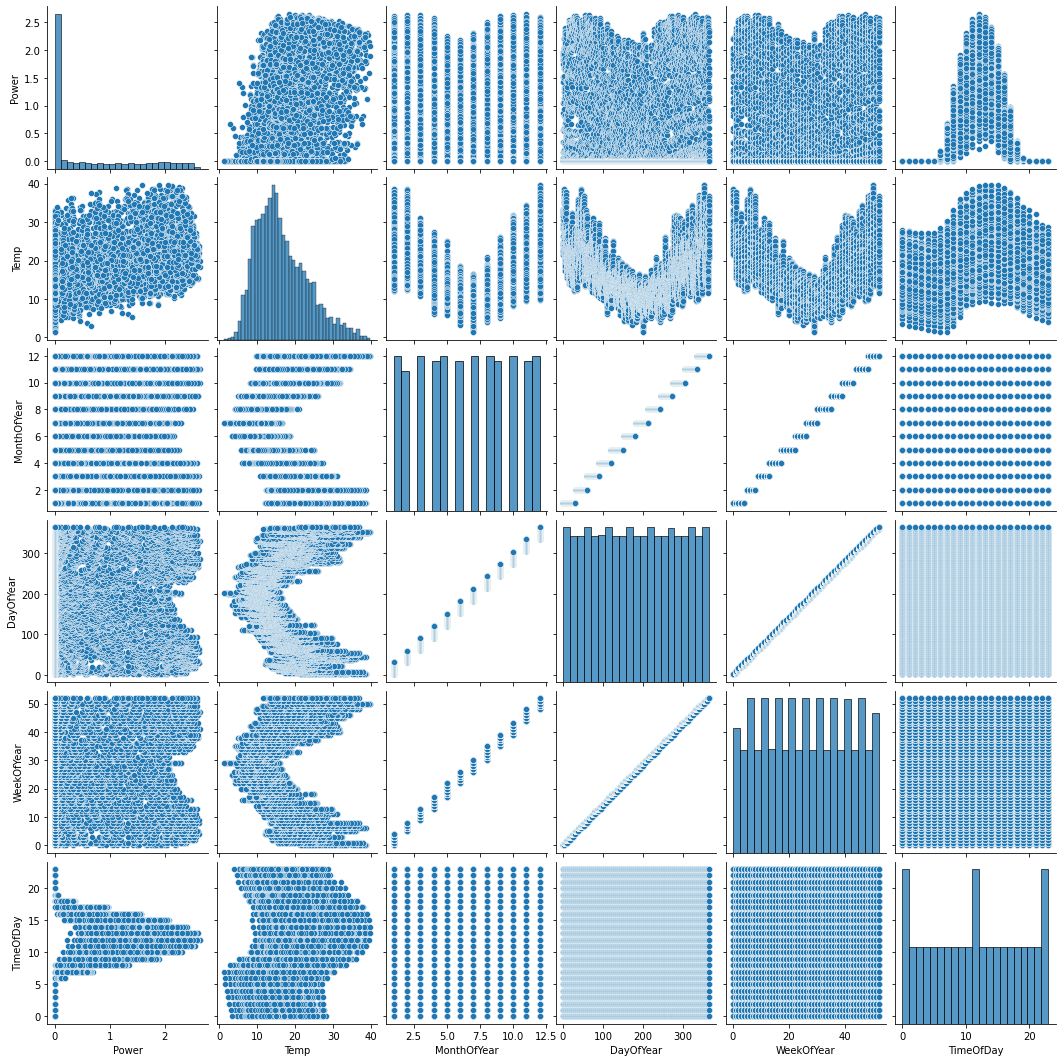

In [14]:
sns.pairplot(df)

In [15]:
X = df[['MonthOfYear', 'DayOfYear', 'WeekOfYear',"TimeOfDay","Temp"]]
y = df.iloc[:,2:3]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
lm = sm.OLS(y, X)
model= lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Power   R-squared (uncentered):                   0.506
Model:                            OLS   Adj. R-squared (uncentered):              0.505
Method:                 Least Squares   F-statistic:                              1792.
Date:                Wed, 21 Apr 2021   Prob (F-statistic):                        0.00
Time:                        09:52:48   Log-Likelihood:                         -9466.3
No. Observations:                8760   AIC:                                  1.894e+04
Df Residuals:                    8755   BIC:                                  1.898e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
MonthOfYear    -0.3028      0.023    -13.066      0.000      -0.348      -0.257
DayOfYear       0.0055      0.004      1.422      0.155      -0.002       0.013
WeekOfYear      0.0301      0.027      1.127      0.260      -0.022       0.082
TimeOfDay      -0.0077      0.001     -7.172      0.000      -0.010      -0.006
Temp            0.0538      0.001     56.880      0.000       0.052       0.056
==============================================================================
Omnibus:                      781.176   Durbin-Watson:                   0.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1005.095
Skew:                           0.827   Prob(JB):                    5.58e-219
Kurtosis:                       2.860   Cond. No.                         758.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# RANDOM FOREST

In [16]:
X = df[['MonthOfYear', 'DayOfYear', 'WeekOfYear',"TimeOfDay","Temp"]]
y = df.iloc[:,2:3]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)  #split

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(X_train, y_train)                             #fit with RandomForestRegressor
feature_importances = regressor.feature_importances_

X_train_best = X_train[['MonthOfYear', 'DayOfYear', 'WeekOfYear',"TimeOfDay","Temp"]]
X_test_best = X_test[['MonthOfYear', 'DayOfYear', 'WeekOfYear',"TimeOfDay","Temp"]]
regressor.fit(X_train_best, y_train)

RandomForestRegressor()

In [17]:
accuracies = cross_val_score(estimator = regressor, X = X_train_best,y = y_train, cv = 10, scoring = 'r2',verbose=2)
accuracy = accuracies.mean()
print('r2 = {}'.format(accuracy))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=   0.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ................................................. , total=   0.9s
[CV]  ................................................................
[CV] ................................................. , total=   0.9s
[CV]  ................................................................
[CV] ................................................. , total=   0.9s
[CV]  ................................................................
[CV] ................................................. , total=   1.0s
[CV]  ................................................................
[CV] ................................................. , total=   1.0s
[CV]  ................................................................
[CV] ................................................. , total=   1.0s
[CV]  ................................................................
[CV] ................................................. , total=   1.0s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    9.5s finished


In [18]:
df.index=df.iloc[:,0]   #all the indexes has been defined   integer location
df.index = pd.to_datetime(df.index)
# Predicting for whole dataset
df['y_pred'] =  regressor.predict(df[['MonthOfYear', 'DayOfYear', 'WeekOfYear',"TimeOfDay","Temp"]])

# Create Interactive Plot Using Bokeh
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import Range1d
output_notebook() 

p = figure(plot_width=800, 
           plot_height=400,
           title="PV Electricity Consumption Prediction",
           x_axis_label='Date and Time',
           y_axis_label='Electricity Consumption',
           x_axis_type="datetime")

p.line(df.index, df['Power'], legend='Observed Electricity Consumption', line_width=1)
p.line(df.index, df['y_pred'], legend='Predicted Electricity Consumption', line_width=1, line_color="red")

show(p, notebook_handle = True)

Loading BokehJS ...

In [19]:
# Sydney 18 aralık hava durumu
print("prediction of solar generation by using random forest regression")
print("---------------18-12-2020----------")
temperature1=[23,22,22,22,22,22,22,23,25,27,29,30,30,27,27,27,26,25,25,24,23,23,23,23]  #real values
day=[x for x in range(0,24)]
for i in range(0,24):
    print((regressor.predict([[12,18,3,day[i],temperature1[i]]])))
print("---------------18-01-2020-----------------")
temperature2=[19,17,17,17,16,16,18,17,18,18,19,20,20,21,22,23,22,22,22,22,22,22,22,21]   #real values
for i in range(0,24):
    print((regressor.predict([[12,18,3,day[i],temperature2[i]]])))

prediction of solar generation by using random forest regression
---------------18-12-2020----------
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.14549]
[0.40902]
[1.14864]
[1.04787]
[1.492]
[2.15272]
[2.14655]
[2.41521]
[2.21689]
[1.76276]
[1.33847]
[0.91991]
[0.33577]
[0.0325]
[0.]
[0.]
[0.]
[0.]
---------------18-01-2020-----------------
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.14392]
[0.47404]
[1.08892]
[1.25254]
[1.74503]
[2.2227]
[2.35455]
[2.4008]
[2.29658]
[1.82808]
[1.53429]
[0.93445]
[0.36071]
[0.03205]
[0.]
[0.]
[0.]
[0.]
